# Saving everything as a multi-index

Let's try to put this together: save epochs as multi-index dataframes

In [2]:
%matplotlib inline
import glob
import os

CORPORA_PATH = "~/projects/corpora/P3Speller/P3Speller-old-y-datos/sets/"

file_path = os.path.expanduser(CORPORA_PATH)
files = glob.glob(os.path.join(file_path, "*.set"))


filename = files[11]

In [3]:
import mne

def event_id_func(x):
    return 1 if x == "0" else 2


data_mne = mne.io.read_raw_eeglab(
    filename, preload=True, event_id={"0": 1, "1": 2})

# We shouldn't filter...yet
# data_mne.filter(1, 20)

Reading /home/marat/projects/corpora/P3Speller/P3Speller-old-y-datos/sets/PruebasMuseo_23298001.fdt
Reading 0 ... 69503  =      0.000 ...   542.992 secs...


In [4]:
events = mne.find_events(data_mne)


1980 events found
Events id: [1 2]


In [5]:
epochs = mne.Epochs(
        data_mne, events,
        baseline=(None, 0), tmin=-0.1, tmax=0.7)

epochs.load_data()

1980 matching events found
0 projection items activated
Loading data for 1980 events and 104 original time points ...
0 bad epochs dropped


<Epochs  |  n_events : 1980 (all good), tmin : -0.1015625 (s), tmax : 0.703125 (s), baseline : (None, 0), ~23.6 MB, data loaded,
 '1': 1650, '2': 330>

In [6]:
epochs.get_data().shape

(1980, 15, 104)

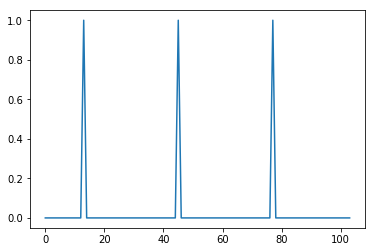

In [7]:
import matplotlib.pyplot as plt
ee = epochs[0]
plt.plot(ee.pick_channels(['STI 014']).get_data().reshape(-1));


MNE has an annoying difference between indexing `epoch[i]` and iterating them. 

In [8]:
channels = epochs.ch_names

print(channels)

['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'STI 014']


In [9]:
ee = epochs[0]

af3 = ee.pick_channels(["AF3"]).get_data().reshape(-1)

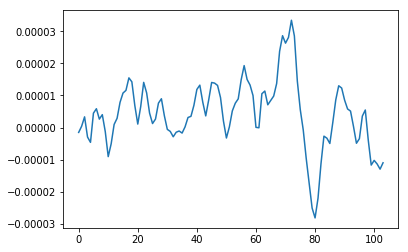

In [10]:
plt.plot(af3)

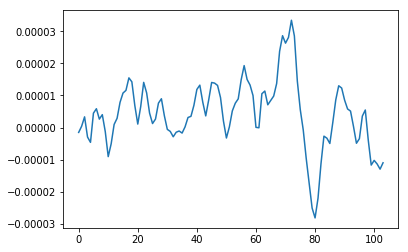

In [95]:
plt.plot(epochs[0].get_data()[0, 0])

## Dataframe just for one epoch

In [64]:
import pandas as pd


ee = epochs[0]

df = pd.DataFrame(ee.get_data()[0], index=pd.MultiIndex.from_product([["epoch_1"], ee.ch_names]))


df

0             1             2             3    \
epoch_1 AF3     -1.526658e-06  3.920503e-07  3.324730e-06 -2.965305e-06   
        F7       5.117595e-07  4.253966e-07 -1.719830e-07 -2.813172e-06   
        F3       6.152192e-07  3.687820e-06  2.141928e-06 -9.316881e-07   
        FC5     -2.373792e-06 -1.974683e-06 -5.670022e-06 -4.231406e-06   
        T7      -6.832144e-06 -2.278836e-06 -6.444740e-06 -1.928716e-05   
        P7      -1.382929e-06 -9.012410e-07 -2.980086e-06 -3.002503e-06   
        O1      -9.163981e-06 -8.649030e-06 -6.090354e-06  3.106463e-06   
        O2       1.741892e-06 -1.358183e-06 -8.535572e-06 -1.865524e-06   
        P8       6.058888e-06  4.463185e-07 -1.076656e-05 -8.623675e-06   
        T8      -1.064444e-07  4.946202e-06  3.835122e-06 -8.515731e-07   
        FC6      1.209958e-05  1.705189e-05  1.277209e-05  1.351624e-06   
        F4       6.122156e-06  5.356394e-06  5.018828e-07 -3.305975e-06   
        F8       1.199132e-05  9.771354e-06  2.958322e-06 -4.333275e-06   
        AF4      2.669176e-06  1.110318e-06 -9.523470e-07 -1.470104e-06   
        STI 014  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

                          4             5             6             7    \
epoch_1 AF3     -4.620607e-06  4.474873e-06  5.852753e-06  2.619952e-06   
        F7      -2.371812e-06  1.137000e-06  2.469512e-08  3.009846e-06   
        F3       6.141678e-07  1.640527e-06  1.127540e-06  2.151872e-06   
        FC5     -5.357520e-06 -3.920921e-06  4.159800e-06  1.117710e-05   
        T7      -9.557490e-06  6.263280e-06 -5.021393e-07  2.484877e-06   
        P7      -9.785634e-07  1.209818e-08 -2.497162e-08  1.472947e-06   
        O1      -1.042606e-06 -7.729045e-06  4.524280e-07  6.036151e-06   
        O2       3.237056e-06  1.296600e-07  1.641414e-06  8.261629e-06   
        P8       3.228511e-06  7.860551e-06  5.819726e-06  8.904757e-06   
        T8      -2.445947e-06  5.716647e-07  3.063060e-06 -5.967313e-07   
        FC6     -5.920912e-06 -1.391793e-06  4.650443e-06  4.523862e-06   
        F4       6.692341e-08  2.399939e-06  1.140471e-06  1.422468e-06   
        F8      -8.519552e-06  2.661768e-06  1.327641e-05  9.515342e-06   
        AF4     -9.624465e-07  1.077533e-06  1.573203e-06  1.554518e-06   
        STI 014  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

                      8             9      ...              94            95   \
epoch_1 AF3      0.000004 -1.263578e-06    ...    -4.902700e-06 -3.478900e-06   
        F7       0.000008  2.279153e-06    ...     5.956905e-07  4.601411e-06   
        F3       0.000002  9.754370e-08    ...     9.724877e-07  4.627721e-07   
        FC5      0.000010  2.126677e-06    ...    -1.434258e-05 -1.490775e-05   
        T7       0.000016  2.226748e-06    ...    -5.795114e-06 -1.758811e-06   
        P7       0.000006  5.457174e-06    ...    -3.822933e-06 -7.933717e-06   
        O1       0.000005  6.411110e-06    ...     3.644079e-06 -3.577236e-06   
        O2       0.000004 -6.678697e-06    ...    -1.842598e-05 -2.091585e-05   
        P8       0.000006 -4.382949e-06    ...    -6.859458e-06 -9.339642e-06   
        T8      -0.000003 -1.216978e-06    ...    -1.677558e-05 -3.159259e-05   
        FC6     -0.000003 -1.308321e-05    ...    -1.515274e-05 -9.043613e-06   
        F4      -0.000004 -1.231231e-05    ...    -7.861855e-05 -7.487687e-05   
        F8      -0.000001 -6.612994e-06    ...    -4.573279e-05 -4.357760e-05   
        AF4     -0.000003 -4.089836e-06    ...    -3.155319e-06  1.453085e-06   
        STI 014  0.000000  0.000000e+00    ...     0.000000e+00  0.000000e+00   

                      96            97        98            99        100  \
epoch_1 AF3      0.000004  5.458520e-06 -0.000004 -1.170050e-05 -0.000010   
        F7       0.000004  4.900595e-06  0.000004 -4.279416e-07 -0.000009   
        F3      -0.000002 -5.421552e-07  0.000002  1.000870e-06  0.000001   
        FC5     -0.

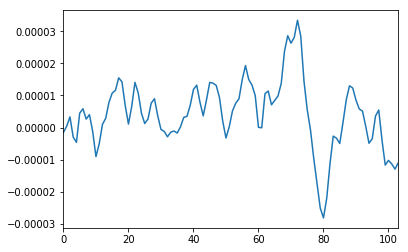

In [63]:
df.loc["epoch_1", "AF3"].plot()

# DataFrame for all the epochs for this subject

In [86]:
# Remove STI 014
ch_names = epochs.ch_names[:-1]

df = None
for i, data in enumerate(epochs):
    data = data[:-1]
    epoch_df = pd.DataFrame(data, index=pd.MultiIndex.from_product([[i], ch_names]))
    if df is not None:
        df = df.append(epoch_df)
    else:
        df = epoch_df
    

In [87]:
df.loc[0, "AF3"]

0     -1.526658e-06
1      3.920503e-07
2      3.324730e-06
3     -2.965305e-06
4     -4.620607e-06
5      4.474873e-06
6      5.852753e-06
7      2.619952e-06
8      4.006428e-06
9     -1.263578e-06
10    -9.065956e-06
11    -5.064081e-06
12     9.644438e-07
13     2.870953e-06
14     7.837742e-06
15     1.073348e-05
16     1.156927e-05
17     1.547010e-05
18     1.423596e-05
19     6.869618e-06
20     1.073662e-06
21     6.560692e-06
22     1.406710e-05
23     1.079359e-05
24     4.466981e-06
25     1.240477e-06
26     2.634196e-06
27     7.602143e-06
28     8.964222e-06
29     3.669940e-06
           ...     
74     1.443373e-05
75     5.531605e-06
76    -7.692389e-07
77    -9.596916e-06
78    -1.735849e-05
79    -2.508205e-05
80    -2.816386e-05
81    -2.202222e-05
82    -1.130623e-05
83    -2.689456e-06
84    -3.322742e-06
85    -4.976293e-06
86     1.563729e-06
87     8.582680e-06
88     1.300957e-05
89     1.229941e-05
90     8.523118e-06
91     5.788682e-06
92     5.113881e-06


In [88]:
df.shape

(27720, 104)